# COP Optimization for a Simple Vapor Recompression Cycle

In [1]:
from vapor_compression import SimpleVaporCompressionCycle, Mode
import numpy as np
import matplotlib.pyplot as plt

## Define Workflow

| Refrigerant | IDAES | CoolProp |
| --- | --- | --- |
| CO2 | Yes | Yes | 
| Propane | Yes | Yes |
| R32 | Yes | Yes |
| R125 | Yes | Yes |
| R134a | Yes | Yes |
| R227ea | Yes | Yes |
| R1234ze | Yes | Yes |



In [2]:
def analyze_refrigerant(working_fluid='R227ea',run_sensitivity=True):
    """
    Analyze the refrigerant properties for a given working fluid.
    
    :param working_fluid: The refrigerant to analyze.
    :return: None
    """

    # Create a SimpleVaporCompressionCycle object
    vc = SimpleVaporCompressionCycle(working_fluid, mode=Mode.PH)
    
    # Draw thermodynamic diagrams
    vc.draw_thermodynamic_diagrams()

    # Specify cycle parameters
    vc.specify_initial_conditions(low_side_temperature=0,
                              high_side_temperature=20)

    # Initialize
    vc.initialize(verbose=True)

    # Set specifications
    vc.set_specifications(
    low_side_pressure=(50, 300), # Pa
    high_side_pressure=(500, 2000), # Pa
    evaporator_temperature=(-30, 10), # degC
    condenser_temperature=(30, 40), # degC
    subcooling = 3, # deg C
    superheating = 3 # deg C
    )

    # Optimize the cycle
    vc.optimize_COP(verbose=True, initialize=True)

    # Report results
    vc.report_solution()

    if run_sensitivity:

        T_ambient = np.linspace(20, 30, 21)

        COP = np.zeros_like(T_ambient)
        opt_converged = np.zeros_like(T_ambient, dtype=bool)

        for i, Ta in enumerate(T_ambient):
            vc.set_specifications(
                low_side_pressure=(50, 300), # Pa
                high_side_pressure=(500, 2000), # Pa
                evaporator_temperature=(-30, 0), # degC
                condenser_temperature=(Ta+5, Ta+15), # degC
                subcooling=3,
                superheating=3
            )
            try:
                print(f"\n\nConsidering ambient temperature of {Ta} C...")
                COP[i], opt_converged[i] = vc.optimize_COP(verbose=False, initialize=False)
            except:
                COP[i] = np.nan
                opt_converged[i] = False

        j = opt_converged
        plt.scatter(T_ambient[j], COP[j], linewidth=3, marker='o',color="blue")
        plt.scatter(T_ambient[~j], COP[~j], linewidth=3, marker='x',color="red")
        plt.xlabel('Ambient temperature (°C)', fontsize=18)
        plt.ylabel('COP', fontsize=18)
        plt.title(f'Simple Vapor Compression with {working_fluid}', fontsize=18)
        plt.grid()
        plt.show()


    

## R227ea

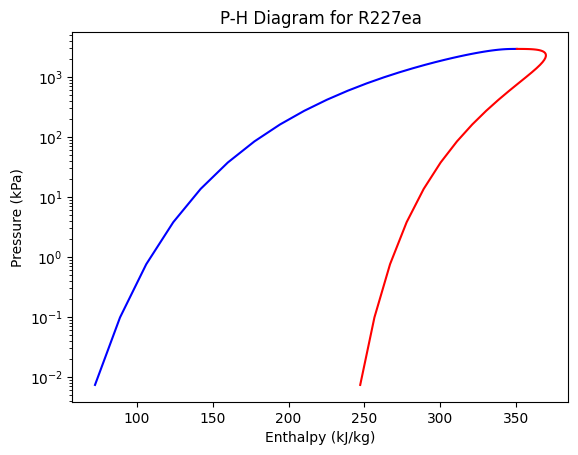

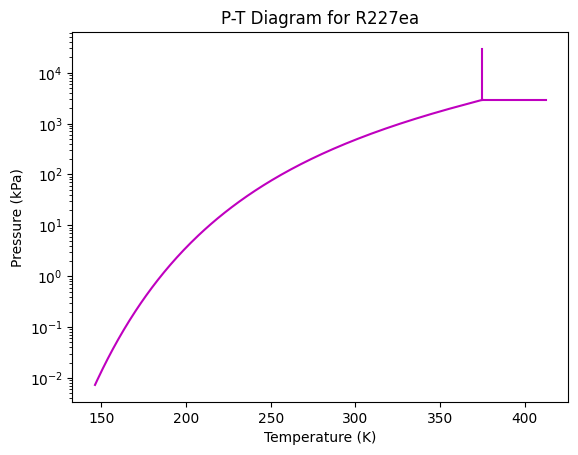

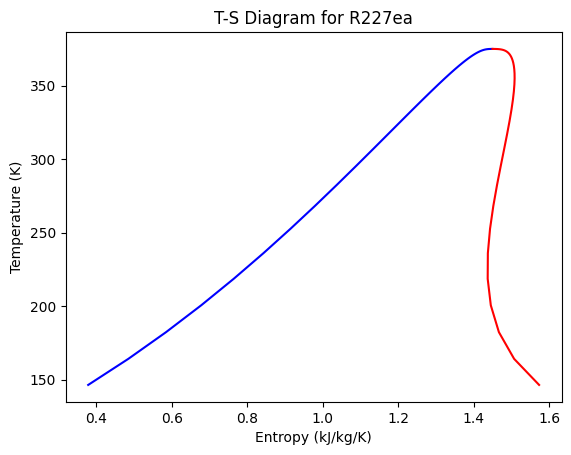

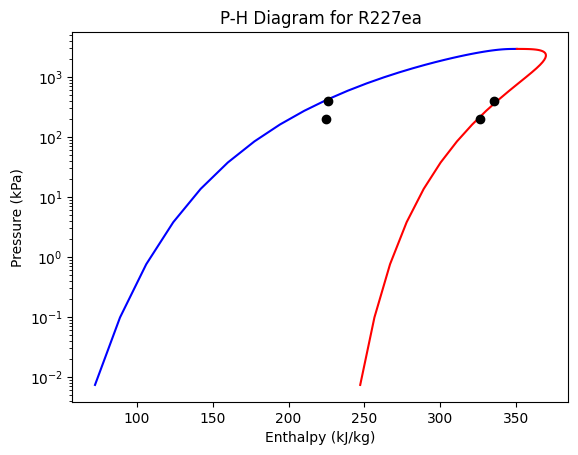

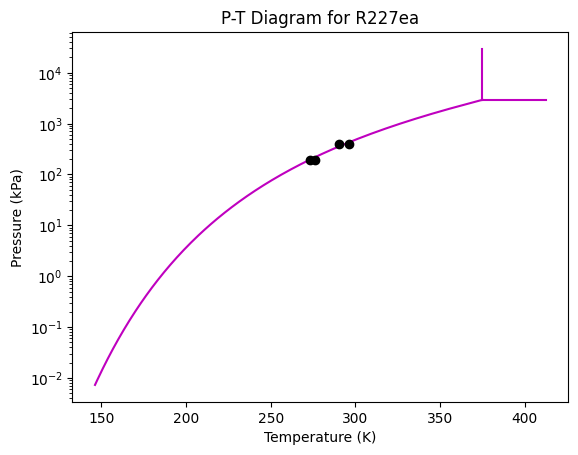

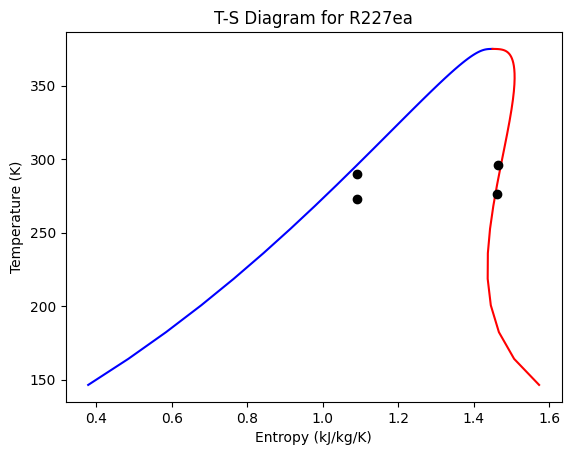


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.0148e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     275.54
    P                          pascal 1.9536e+05 1.9536e+05
    Vapor Fraction      dimensionless    0.20000     1.0000
    Mass Enthalpy    joule / kilogram 2.2489e+05 3.2637e+05


  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.



Unit : fs.compressor                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key                   : Value      : Units         : Fixed : Bounds
    Isentropic Efficiency :    0.85000 : dimensionless :  True : (None, None)
          Mechanical Work :     10086. :          watt : False : (None, None)
          Pressure Change : 1.9372e+05 :        pascal : False : (None, None)
           Pressure Ratio :     1.9916 : dimensionless : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     275.54     293.15
    P                          pascal 1.9536e+05 3.8908e+05
   

2025-04-16 11:42:36 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-04-16 11:42:36 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-04-16 11:42:36 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             5.8814                   5.8814                      5.8814                        5.8814          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             280.89                   317.56                      306.87                        275.46          
    P                          pascal         2.1282e+05               7.9157e+05                  7.9157e+05                    2.1282e+05          
    Vapor Fraction      dimensionless             1.0000      

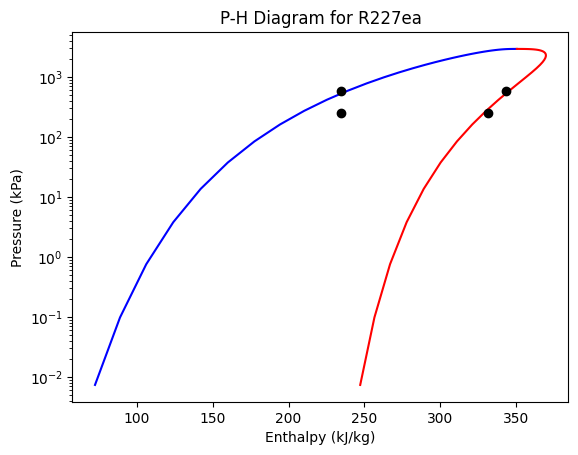

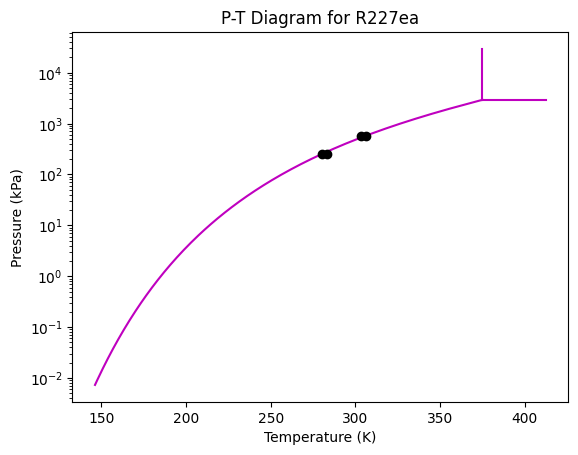

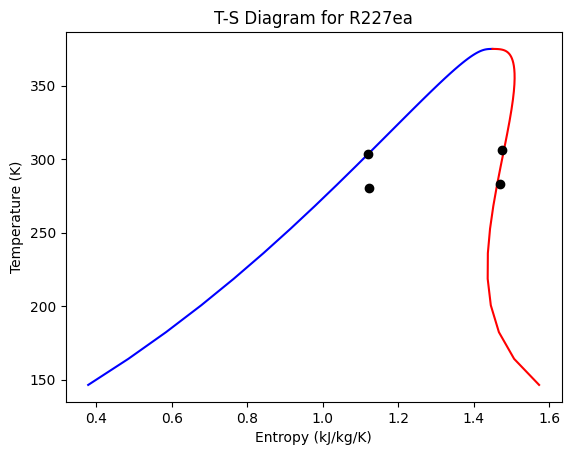


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value  : Units : Fixed : Bounds
    Heat Duty : 96790. :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     280.15     283.15
    P                          pascal 2.5185e+05 2.5185e+05
    Vapor Fraction      dimensionless    0.22110     1.0000
    Mass Enthalpy    joule / kilogram 2.3464e+05 3.3143e+05

Unit : fs.compressor                                                       Time: 0.0
-------------------------------------------------------------------------------



Considering ambient temperature of 20.5 C...




Considering ambient temperature of 21.0 C...




Considering ambient temperature of 21.5 C...




Considering ambient temperature of 22.0 C...




Considering ambient temperature of 22.5 C...




Considering ambient temperature of 23.0 C...




Considering ambient temperature of 23.5 C...




Considering ambient temperature of 24.0 C...




Considering ambient temperature of 24.5 C...




Considering ambient temperature of 25.0 C...




Considering ambient temperature of 25.5 C...




Considering ambient temperature of 26.0 C...




Considering ambient temperature of 26.5 C...




Considering ambient temperature of 27.0 C...




Considering ambient temperature of 27.5 C...




Considering ambient temperature of 28.0 C...




Considering ambient temperature of 28.5 C...




Considering ambient temperature of 29.0 C...




Considering ambient temperature of 29.5 C...




Considering ambient temperature of 30.0 C...


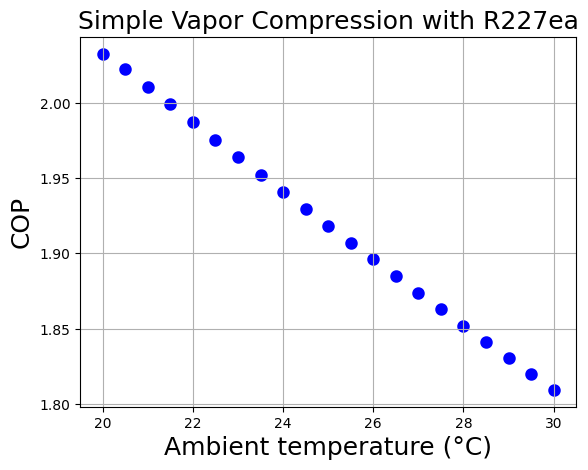

In [3]:
analyze_refrigerant('R227ea')

## R134a

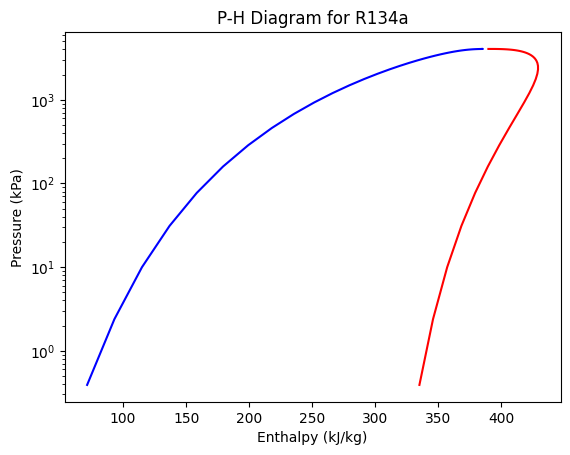

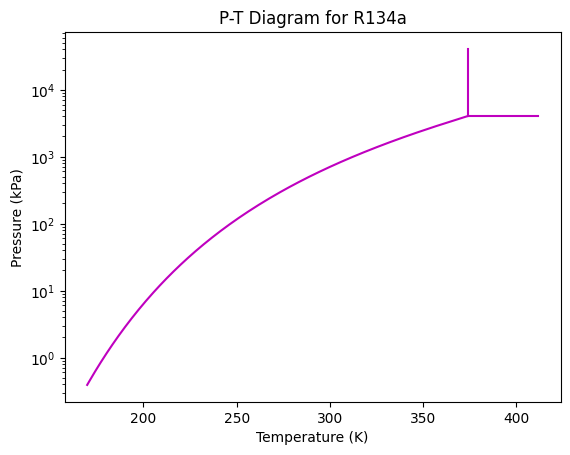

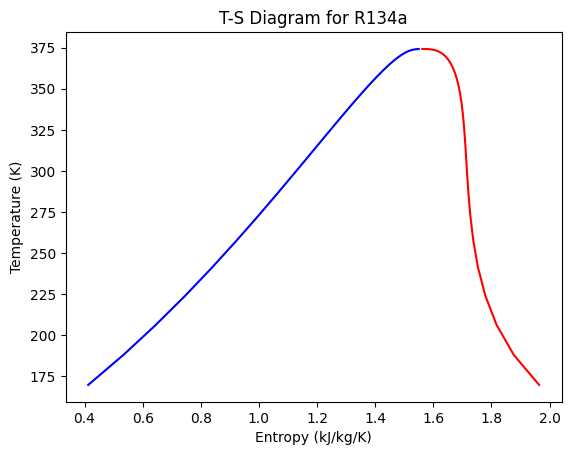

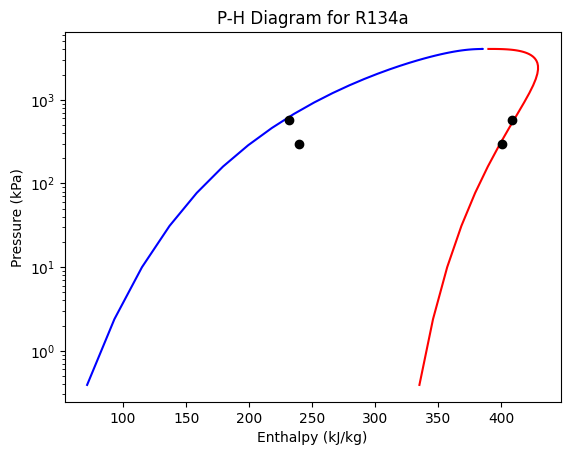

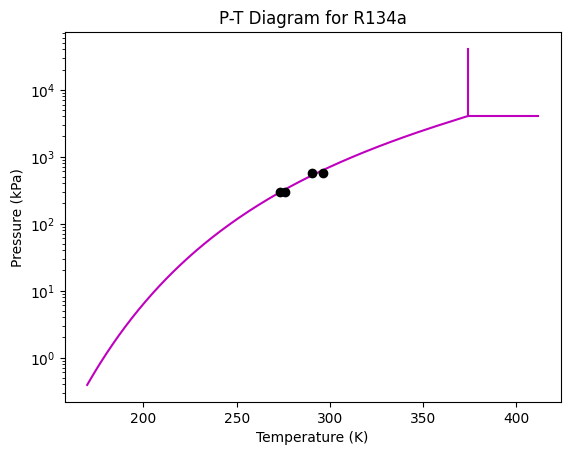

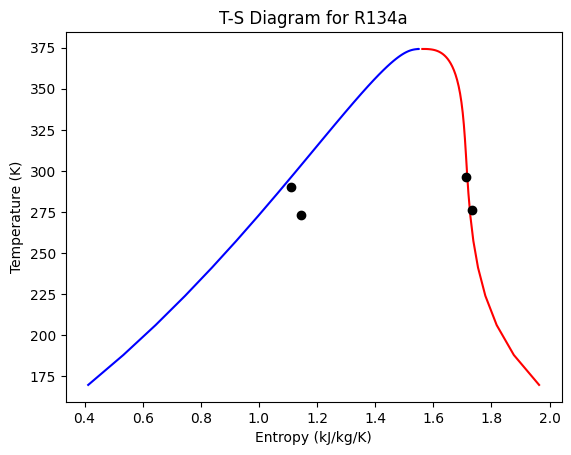

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.



Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.6062e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     275.09
    P                          pascal 2.9280e+05 2.9280e+05
    Vapor Fraction      dimensionless    0.20000     1.0000
    Mass Enthalpy    joule / kilogram 2.3972e+05 4.0034e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

2025-04-16 11:42:43 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-04-16 11:42:43 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-04-16 11:42:43 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             9.8008                   9.8008                      9.8008                        9.8008          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             276.88                   328.10                      305.35                        269.49          
    P                          pascal         2.5593e+05               9.6807e+05                  9.6807e+05                    2.5593e+05          
    Vapor Fraction      dimensionless             1.0000      

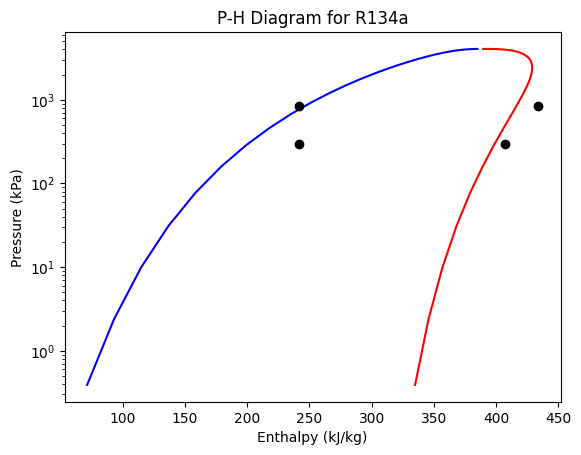

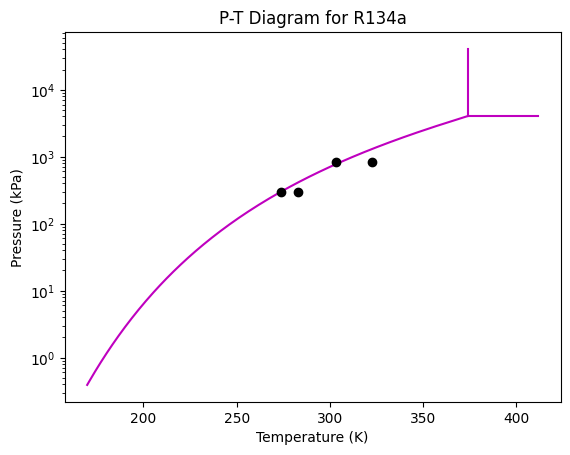

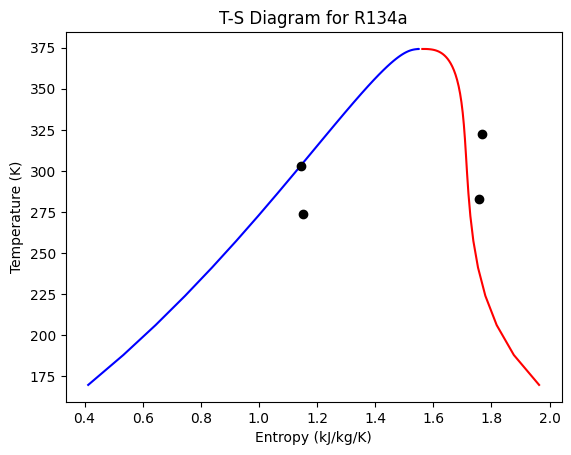


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.6562e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.82     283.15
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless    0.20605     1.0000
    Mass Enthalpy    joule / kilogram 2.4172e+05 4.0734e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------



Considering ambient temperature of 20.5 C...




Considering ambient temperature of 21.0 C...




Considering ambient temperature of 21.5 C...




Considering ambient temperature of 22.0 C...




Considering ambient temperature of 22.5 C...




Considering ambient temperature of 23.0 C...




Considering ambient temperature of 23.5 C...




Considering ambient temperature of 24.0 C...




Considering ambient temperature of 24.5 C...




Considering ambient temperature of 25.0 C...




Considering ambient temperature of 25.5 C...




Considering ambient temperature of 26.0 C...




Considering ambient temperature of 26.5 C...




Considering ambient temperature of 27.0 C...




Considering ambient temperature of 27.5 C...




Considering ambient temperature of 28.0 C...




Considering ambient temperature of 28.5 C...




Considering ambient temperature of 29.0 C...




Considering ambient temperature of 29.5 C...




Considering ambient temperature of 30.0 C...


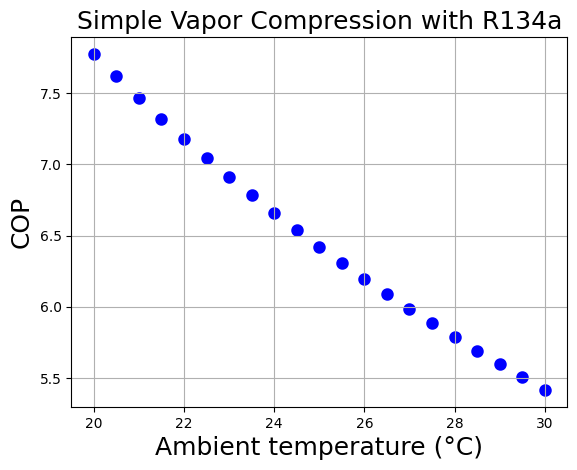

In [4]:
analyze_refrigerant('R134a')

## R32

In [5]:
# Initialization fails with out of bounds enthalpy error
# Optimization and sensitivity analyses do not run
# analyze_refrigerant('R32')

## R125

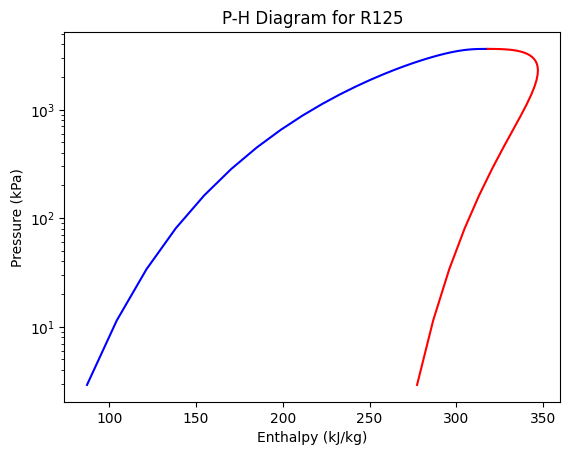

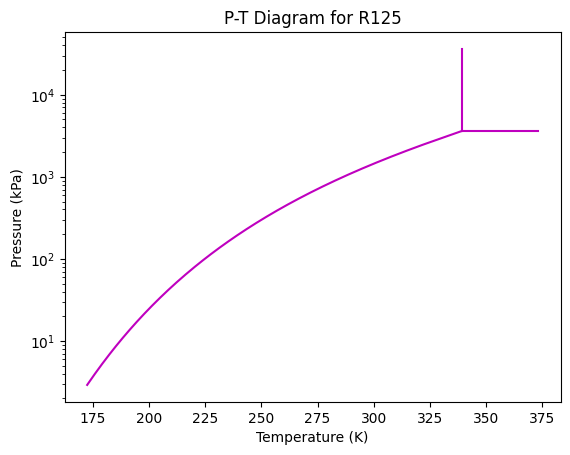

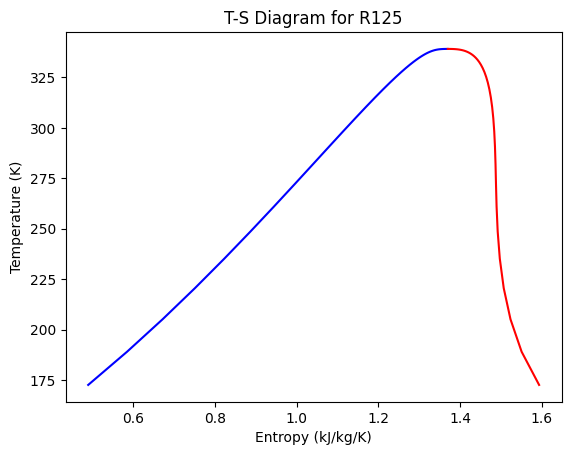

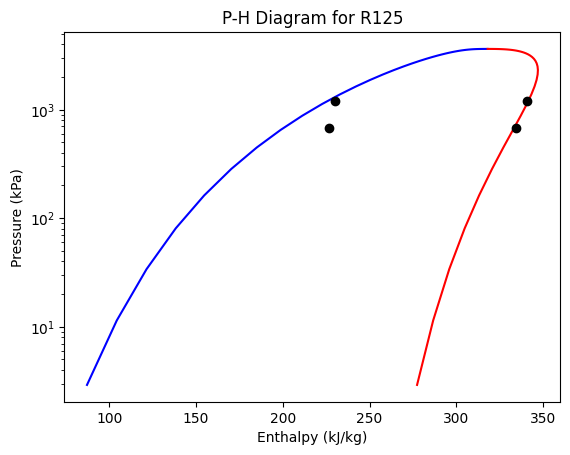

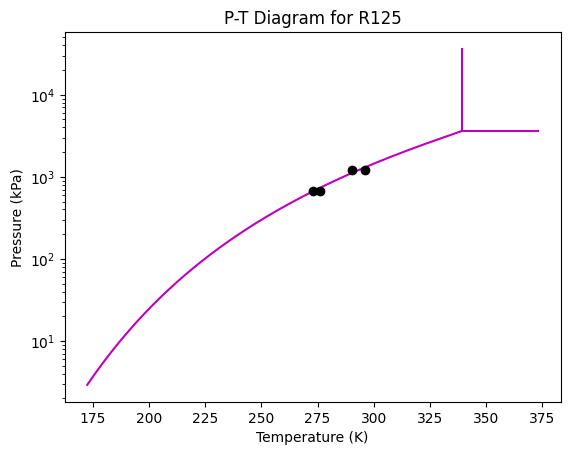

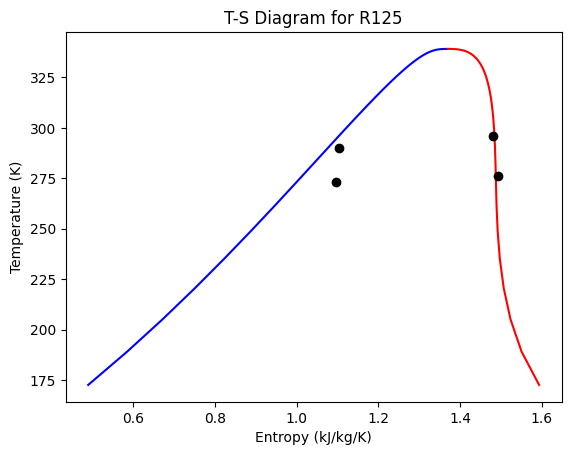

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.



Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.0793e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     8.3318     8.3318
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     274.74
    P                          pascal 6.7052e+05 6.7052e+05
    Vapor Fraction      dimensionless    0.20000     1.0000
    Mass Enthalpy    joule / kilogram 2.2663e+05 3.3456e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

2025-04-16 11:42:46 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-04-16 11:42:46 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-04-16 11:42:46 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Initialization failed



Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             8.3318                   8.3318                      8.3318                        8.3318          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             254.66                   311.00                      303.15                        250.06          
    P                          pascal         3.0000e+05               1.5275e+06                  1.6920e+06                    3.0000e+05          
    Vapor Fraction      dimensionless             1.0000      

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.compressor.ratioP_calculation[0.0]: 1.63818E-01
    fs.condenser.T_lower_bound: 3.02936E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 1.64379E-01
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.63795E-01


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             8.3318                   8.3318                      8.3318                        8.3318          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             258.91 

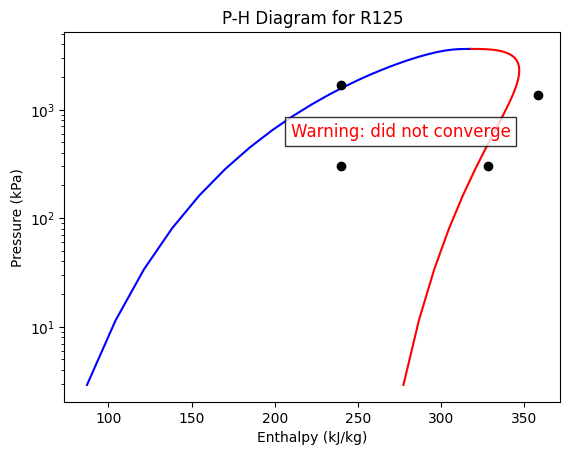

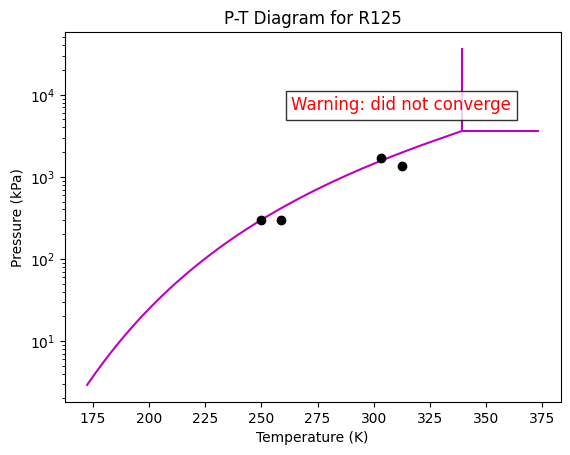

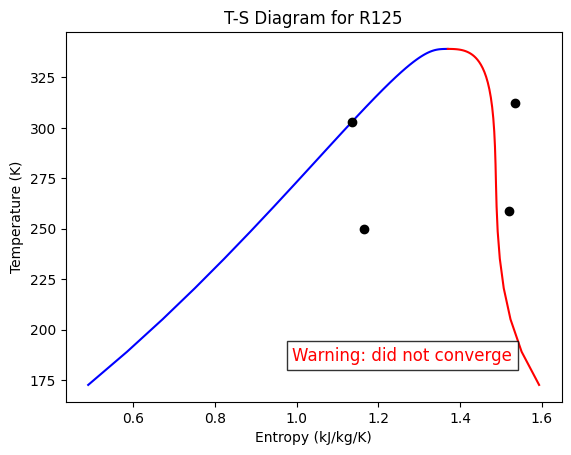


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value  : Units : Fixed : Bounds
    Heat Duty : 88474. :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     8.3318     8.3318
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     250.06     258.91
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless    0.45410     1.0000
    Mass Enthalpy    joule / kilogram 2.3981e+05 3.2829e+05

Unit : fs.compressor                                                       Time: 0.0
-------------------------------------------------------------------------------

In [6]:
# Ipopt always fails to converge
analyze_refrigerant('R125', run_sensitivity=False)

## R1234ze

In [7]:
# Refrigerant name is not consistent across CoolProp and IDAES?
# analyze_refrigerant('R1234ze')

## CO2

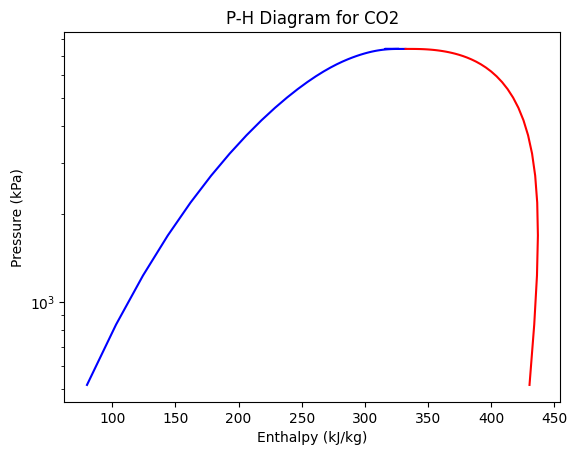

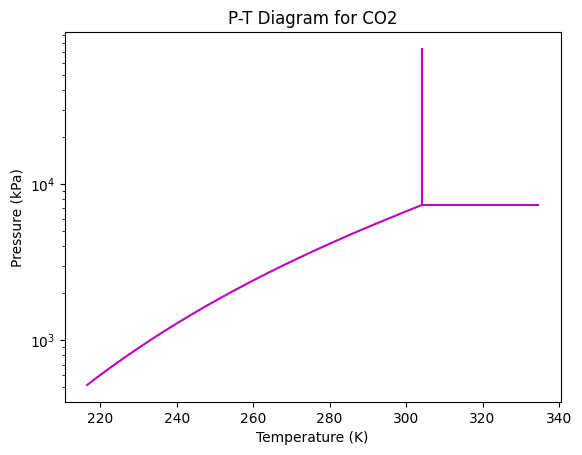

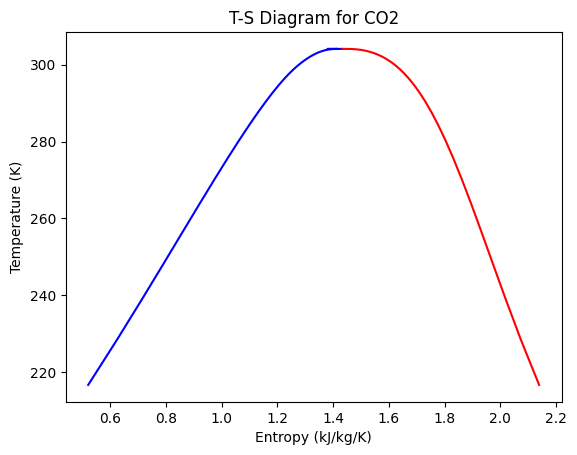

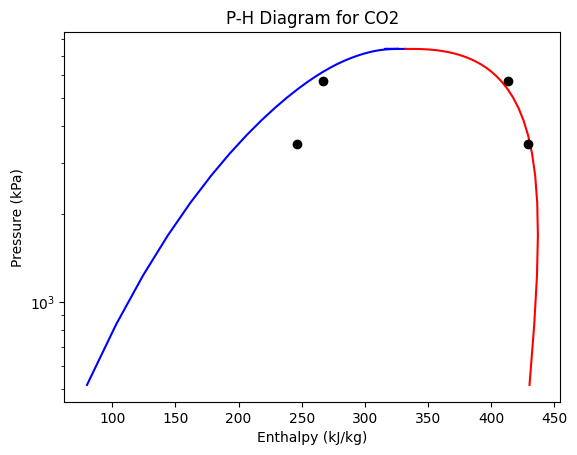

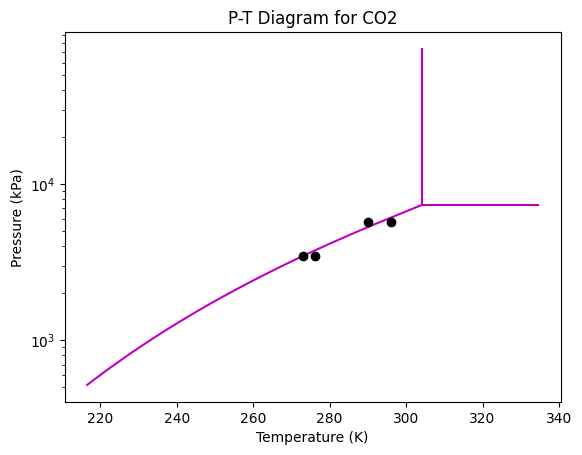

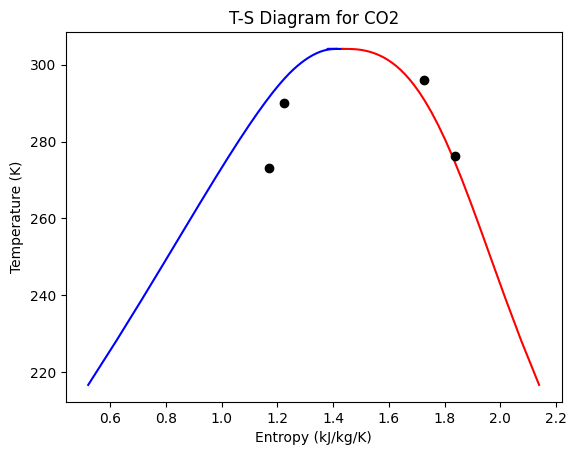

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.



Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.8279e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     22.722     22.722
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     273.15
    P                          pascal 3.4851e+06 3.4851e+06
    Vapor Fraction      dimensionless    0.20000    0.99168
    Mass Enthalpy    joule / kilogram 2.4618e+05 4.2897e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

2025-04-16 11:42:49 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-04-16 11:42:49 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-04-16 11:42:49 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Initialization failed



Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             22.722                   22.722                      22.722                        22.722          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             216.00                   253.65                      253.65                        216.00          
    P                          pascal         3.0000e+05               2.0000e+06                  2.0000e+06                    3.0000e+05          
    Vapor Fraction      dimensionless            0.86968      

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.evaporator.T_lower_bound: 2.42124E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 1.12776E+00
    fs.compressor.ratioP_calculation[0.0]: 7.69772E-01
    fs.condenser.subcooling_constraint: 3.00000E+00
    fs.condenser.T_lower_bound: 4.95026E+01
    fs.condenser.control_volume.pressure_balance[0.0]: 1.50447E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 1.12776E+00
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.51835E-02


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             22.722    

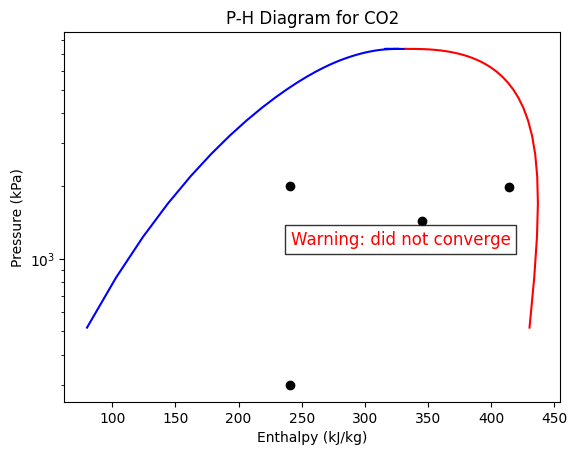

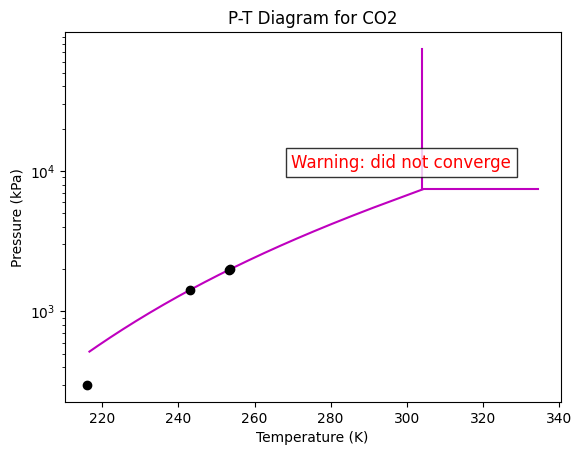

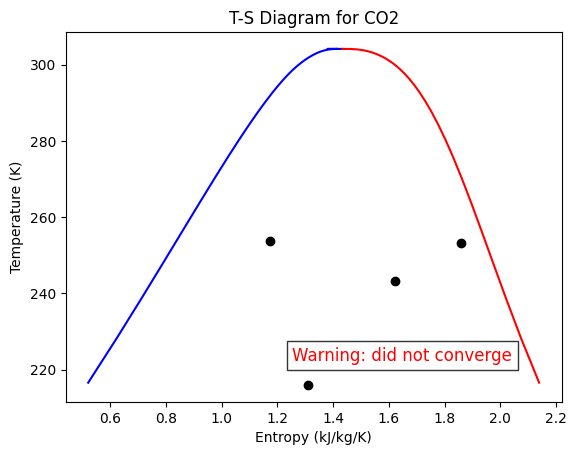


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.0422e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     22.722     22.722
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     216.00     243.15
    P                          pascal 3.0000e+05 1.4278e+06
    Vapor Fraction      dimensionless    0.45525    0.69801
    Mass Enthalpy    joule / kilogram 2.4095e+05 3.4517e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

In [8]:
# Ipopt always fails to converge
analyze_refrigerant('CO2', run_sensitivity=False)

## Propane

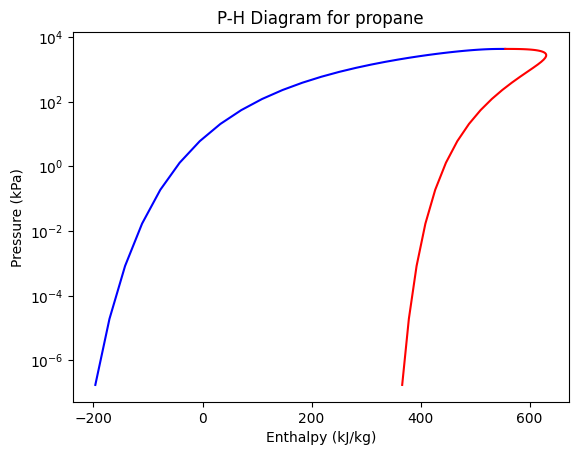

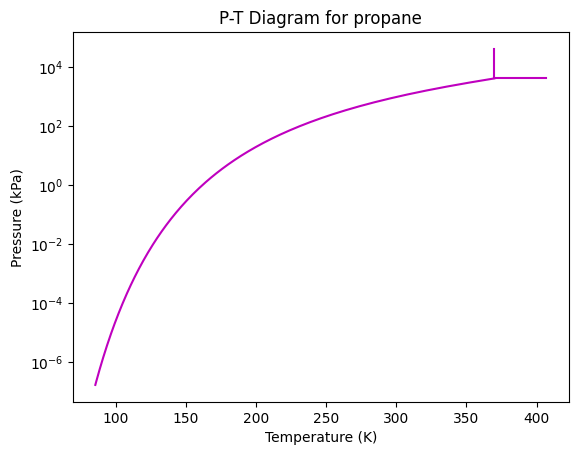

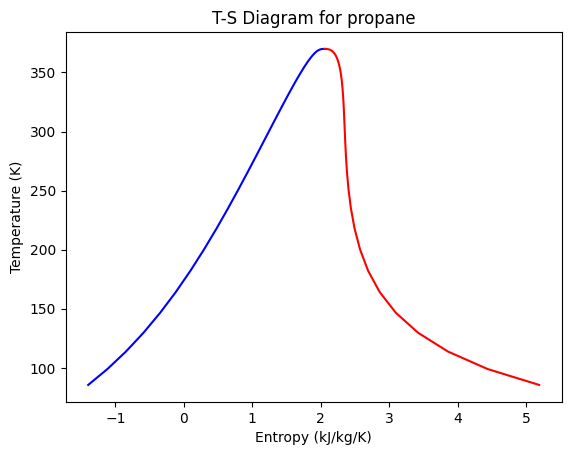

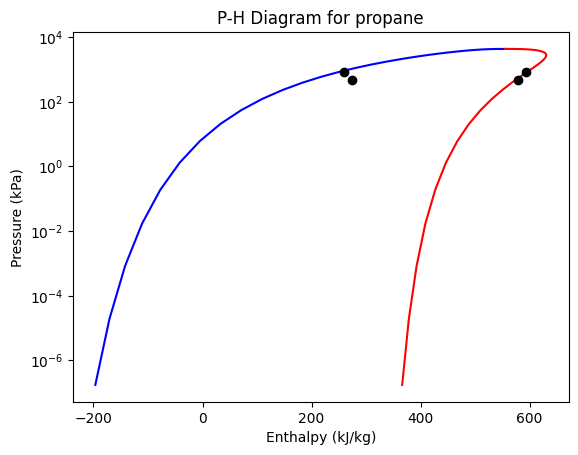

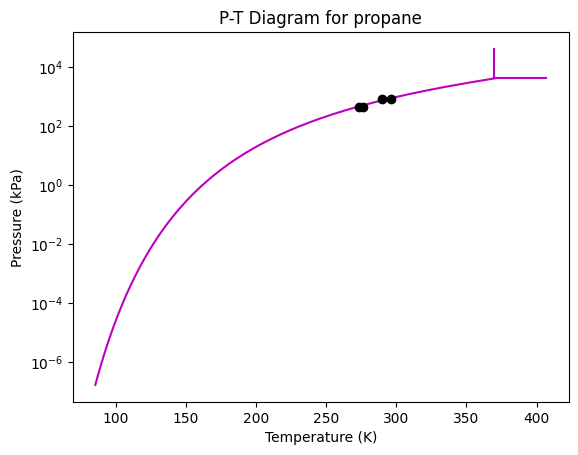

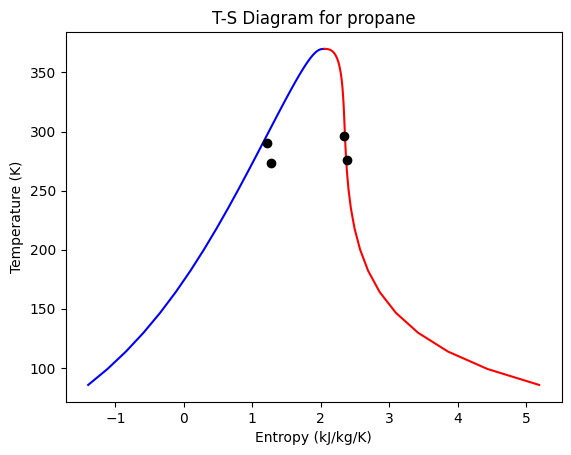

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.



Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 3.0318e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     22.678     22.678
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     275.04
    P                          pascal 4.7446e+05 4.7446e+05
    Vapor Fraction      dimensionless    0.20000     1.0000
    Mass Enthalpy    joule / kilogram 2.7497e+05 5.7816e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

2025-04-16 11:42:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-04-16 11:42:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-04-16 11:42:51 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 

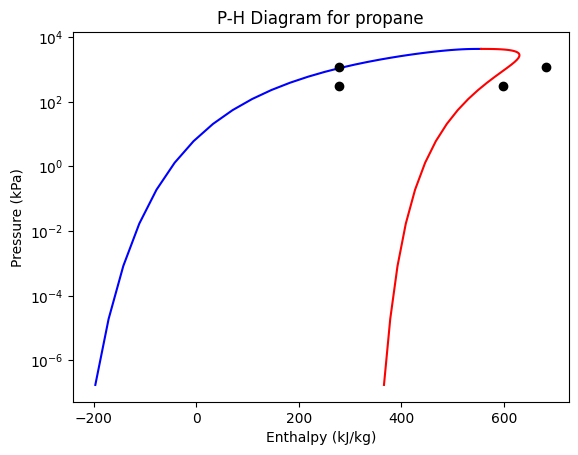

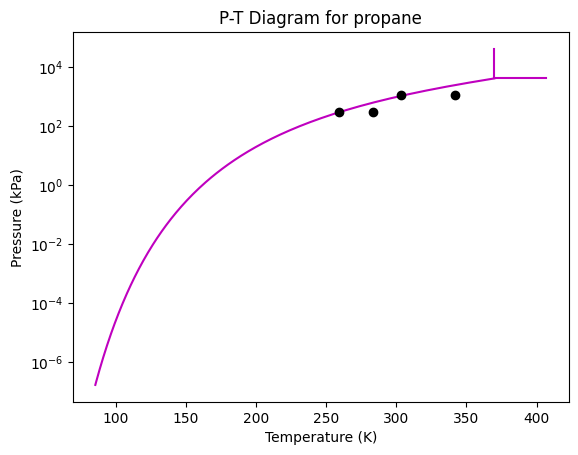

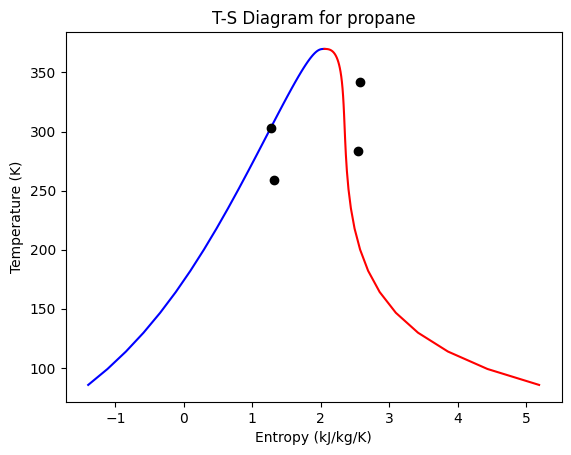


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 3.1997e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     22.678     22.678
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     258.97     283.15
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless    0.28852     1.0000
    Mass Enthalpy    joule / kilogram 2.7882e+05 5.9879e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------



Considering ambient temperature of 20.5 C...




Considering ambient temperature of 21.0 C...




Considering ambient temperature of 21.5 C...




Considering ambient temperature of 22.0 C...




Considering ambient temperature of 22.5 C...




Considering ambient temperature of 23.0 C...




Considering ambient temperature of 23.5 C...




Considering ambient temperature of 24.0 C...




Considering ambient temperature of 24.5 C...




Considering ambient temperature of 25.0 C...




Considering ambient temperature of 25.5 C...




Considering ambient temperature of 26.0 C...




Considering ambient temperature of 26.5 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 2.90019E-04
    fs.condenser.T_lower_bound: 3.04334E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 1.24234E-03
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.90427E-03



Considering ambient temperature of 27.0 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 4.57031E-04
    fs.condenser.T_lower_bound: 3.04836E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 1.55541E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.87207E-03



Considering ambient temperature of 27.5 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 8.18972E-04
    fs.condenser.T_lower_bound: 3.05338E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 2.97942E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.84310E-03



Considering ambient temperature of 28.0 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 1.37574E-03
    fs.condenser.T_lower_bound: 2.94214E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 4.39625E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.81824E-03



Considering ambient temperature of 28.5 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 2.12635E-03
    fs.condenser.T_lower_bound: 3.06342E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 5.80646E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.79358E-03



Considering ambient temperature of 29.0 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 3.07070E-03
    fs.condenser.T_lower_bound: 3.06844E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 7.20999E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.77060E-03



Considering ambient temperature of 29.5 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 4.20860E-03
    fs.condenser.T_lower_bound: 3.07345E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 8.60693E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.74920E-03



Considering ambient temperature of 30.0 C...


  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 3.00000E+00
    fs.compressor.ratioP_calculation[0.0]: 5.54012E-03
    fs.condenser.T_lower_bound: 3.07847E-06
    fs.condenser.control_volume.pressure_balance[0.0]: 9.99736E-02
    fs.compressor_to_condenser_expanded.pressure_equality[0.0]: 1.72926E-03



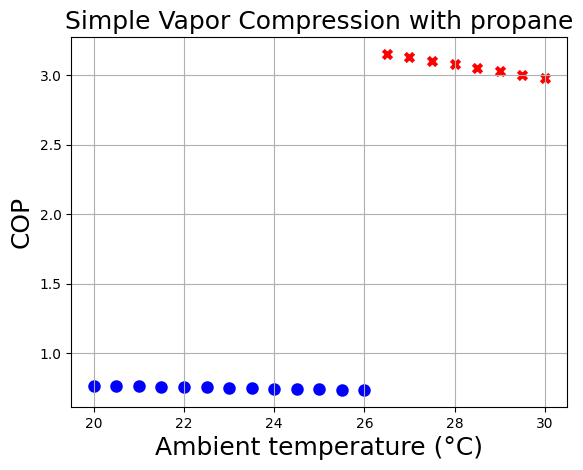

In [9]:
# Fails to converge for higher ambient temperatures
analyze_refrigerant('propane')